In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

### Cleaning and exploration

In [3]:
df = pd.read_csv('TV_Shows.csv')
df

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [4]:
del df['Unnamed: 0']
df
# deleting the extra index

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [5]:
df_index = df.index
df_index

RangeIndex(start=0, stop=5611, step=1)

In [6]:
df_cols = df.columns
df_cols
# getting the column numbers

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'type'],
      dtype='object')

In [7]:
df_index.values
# looking at the range of values 

array([   0,    1,    2, ..., 5608, 5609, 5610])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1010 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
 9   type             5611 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 438.5+ KB


In [9]:
df.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [10]:
print("Number of datapoints:", df.shape[0])
print("Number of features:", df.shape[1])

Number of datapoints: 5611
Number of features: 10


In [11]:
df[df.Year > 2006]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [15]:
df[df.Year < 2006]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
5,The Office,2005,16+,8.9,81%,1,0,0,0,1
7,Supernatural,2005,16+,8.4,93%,1,0,0,0,1
9,Avatar: The Last Airbender,2005,7+,9.2,NaN,1,0,0,0,1
22,Twin Peaks,1990,18+,8.8,89%,1,1,0,0,1
35,Grey's Anatomy,2005,16+,7.6,83%,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5578,Spin and Marty,1955,all,8.2,NaN,0,0,0,1,1
5579,The Book of Pooh,2001,NaN,6.3,NaN,0,0,0,1,1
5584,The Avengers: United They Stand,1999,7+,5.5,NaN,0,0,0,1,1
5585,Spider-Woman,1979,all,5.7,NaN,0,0,0,1,1


In [16]:
df.loc[(df.IMDb == 8.9) | ( df['Age'] =='16+')]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
5,The Office,2005,16+,8.9,81%,1,0,0,0,1
7,Supernatural,2005,16+,8.4,93%,1,0,0,0,1
11,Dark,2017,16+,8.7,94%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4527,The Irish Mob,2016,16+,7.3,NaN,0,0,1,0,1
4609,The Worst Thing I Ever Did,2014,16+,5.4,NaN,0,0,1,0,1
4610,The Suspects: True Australian Thrillers,2010,16+,7.9,NaN,0,0,1,0,1
5516,Wicked Tuna,2012,16+,6.6,NaN,0,0,0,1,1


In [18]:
df.loc[(df.IMDb == 10) | ( df['Age'] =='21+')]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type


In [19]:
df.loc[(df.IMDb == 9.1) | ( df['Age'] =='16+')]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
5,The Office,2005,16+,8.9,81%,1,0,0,0,1
7,Supernatural,2005,16+,8.4,93%,1,0,0,0,1
11,Dark,2017,16+,8.7,94%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4609,The Worst Thing I Ever Did,2014,16+,5.4,NaN,0,0,1,0,1
4610,The Suspects: True Australian Thrillers,2010,16+,7.9,NaN,0,0,1,0,1
5465,The Imagineering Story,2019,7+,9.1,100%,0,0,0,1,1
5516,Wicked Tuna,2012,16+,6.6,NaN,0,0,0,1,1


<ipython-input-12-61c8daff3e6e>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-12-61c8daff3e6e>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


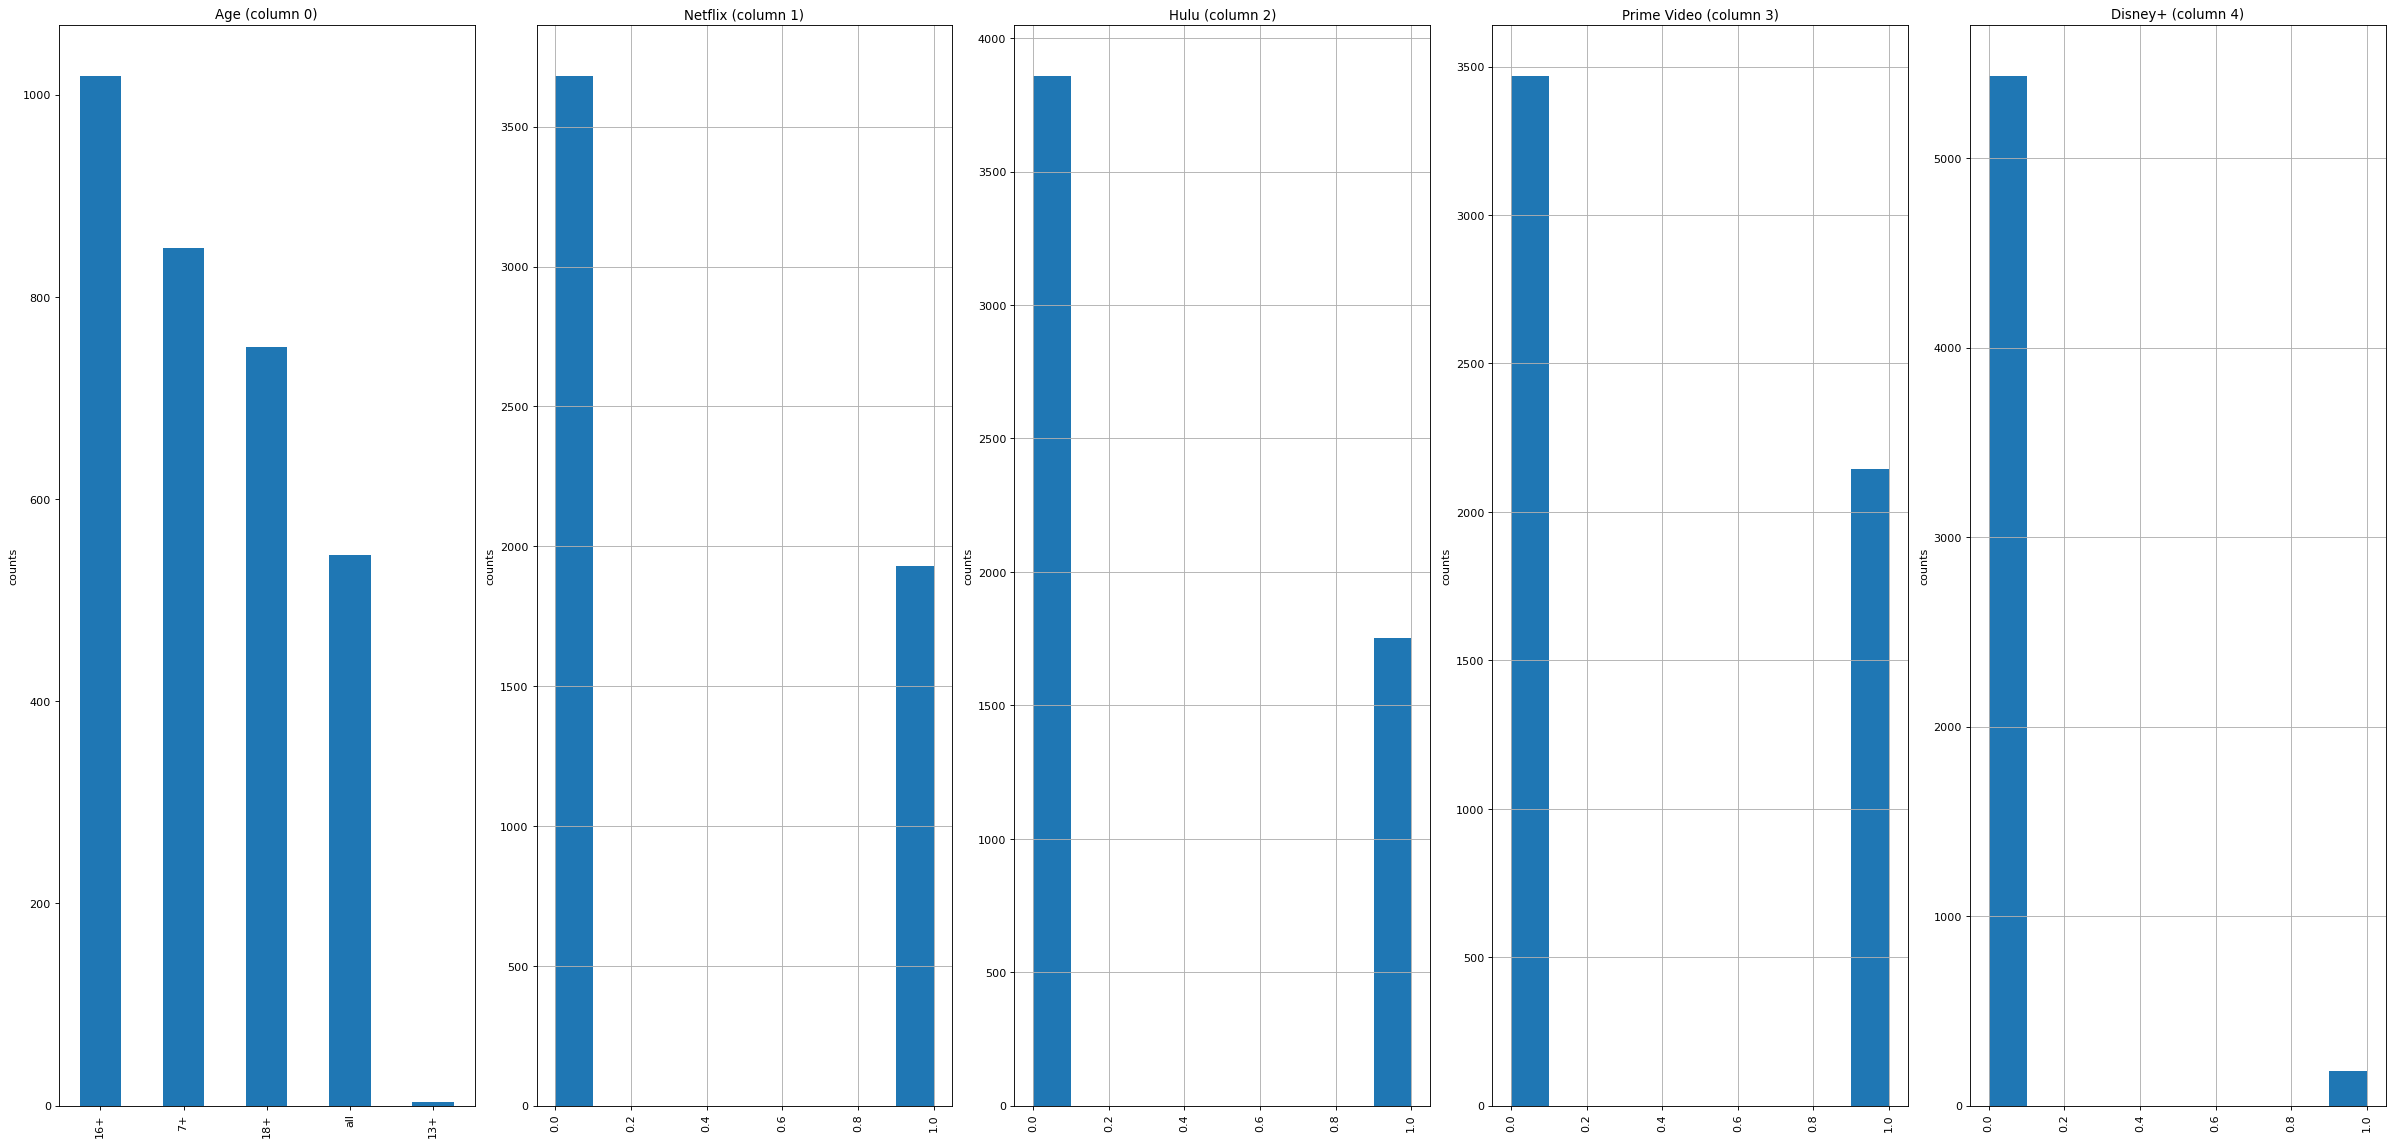

In [12]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df, 10, 5)

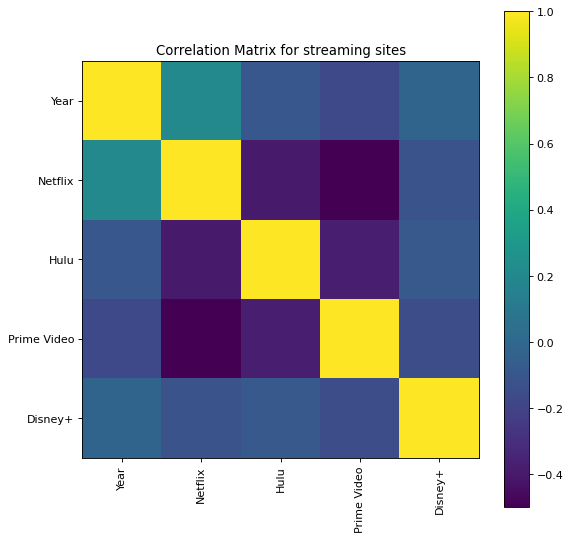

In [13]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for streaming sites')
    plt.show()
plotCorrelationMatrix(df, 8)

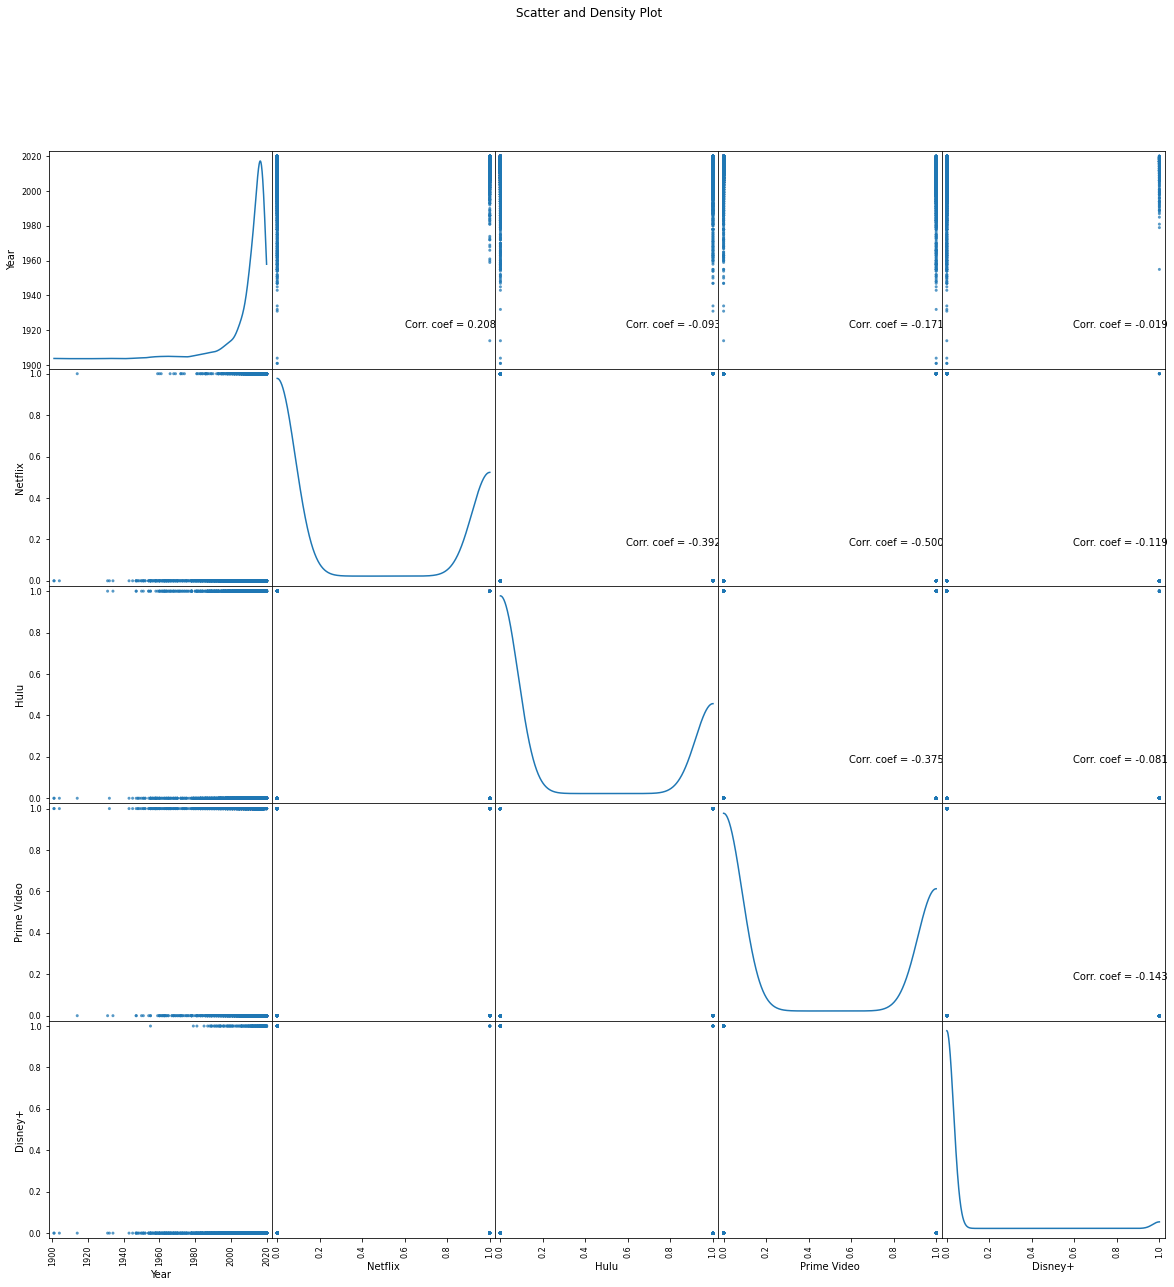

In [14]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(df, 20, 10)